# Question 4 

# # (i)

Find the difference between the maximum and the minimum monthly average temperatures for each country and report/visualize top 20 countries with the maximum differences for the period since 1900.

In [2]:
#import required libraries
%matplotlib inline
import pandas as pd
from datetime import datetime,date
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read in temp csv as pandas frame
temp = pd.read_csv('TEMP.csv')

In [4]:
temp.head()

Date  MAverageTemp  MAverageTempUncertainty      Country
0  1838-04-01        13.008                    2.586  Afghanistan
1  1838-05-01           NaN                      NaN  Afghanistan
2  1838-06-01        23.950                    2.510  Afghanistan
3  1838-07-01        26.877                    2.883  Afghanistan
4  1838-08-01        24.938                    2.992  Afghanistan

Upon inspection of the dataframe, we notice that the TEMP.csv dates are coded either as %Y-&m-%d or as %m/%d/%y. This creates a tricky problem. We want to subset the data to dates after **1900**. Fortunately, all dates after 1900 are coded in the %m/%d/%y format. Therefore we can disregard the dates coded as %Y-&m-%d by simple string length. 

In [5]:
#Create new data file with dates greater than 1900
temp2 = temp[temp.Date.str.len() <= 8]

In [6]:
temp2.head()

Date  MAverageTemp  MAverageTempUncertainty      Country
741  1/1/00        -3.428                    0.936  Afghanistan
742  2/1/00         1.234                    1.135  Afghanistan
743  3/1/00        10.545                    0.933  Afghanistan
744  4/1/00        13.352                    0.536  Afghanistan
745  5/1/00        20.260                    0.524  Afghanistan

Now we have the dates we want to solve this part of the problem (all dates after 1/1/1900)

In [7]:
#Group dataframe by Country
tempgroup=temp2.groupby("Country")

In [8]:
#Find the difference between the maximum and minimum average temperatures for each country
tempgroup.tempdiff = tempgroup['MAverageTemp'].max() - tempgroup['MAverageTemp'].min()

#Order the countries by temperature difference in descending order
tempgroup.tempdiff = tempgroup.tempdiff.order(ascending=False)

#Drop the NAs
tempgroup.tempdiff = tempgroup.tempdiff.dropna()

#Create an object containing only the top 20 temperature differences by country
top20 = tempgroup.tempdiff[0:20]

In [9]:
#Report Top 20 Countries
top20

Country
Kazakhstan      49.163
Mongolia        48.010
Russia          46.682
Canada          43.532
Uzbekistan      42.698
Turkmenistan    40.579
Belarus         39.338
Finland         39.068
Estonia         38.815
Ukraine         38.660
Kyrgyzstan      38.436
North Korea     38.342
Latvia          38.063
Moldova         38.012
Greenland       37.516
Denmark         37.138
Lithuania       36.970
Tajikistan      35.829
Poland          35.616
Armenia         35.273
Name: MAverageTemp, dtype: float64

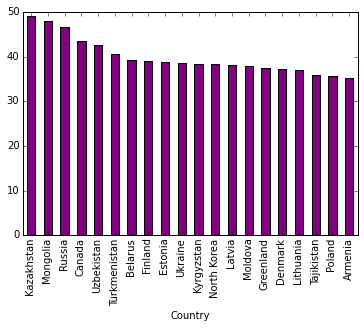

In [10]:
#Plot the Countries with the greatest average temperature differences
top20.plot.bar(color='purple', y = "Temperature Difference")

We have successfully found the difference between the maximum and the minimum monthly average temperatures for each country and have reported and visualized top 20 countries with the maximum differences for the period since 1900.

# (ii)

Select a subset of data and call it “UStemp” for US land temperatures starting from 01/01/1990 in Temp data. Use UStemp dataset to answer the following:


* **SPECIAL NOTE** * We come across a major issue in dealing with the TEMP.csv file due to the format in which dates are coded. The dates 1/1/1900 and 1/1/2000 are both coded as "1/1/00" for all values through the 1900's. Dates automatically code as 1/1/2000 instead of the intended 1/1/1900. Due to this, in order to capture dates from 1/1/1990 and beyond, we must perform some a for-loop and other python magic in order to re-code all of the dates in the 1900s previously coded as 1/1/00 to 1/1/1900 so that we are reporting within the correct century. 

In [11]:
#We read in the TEMP.csv file again in order to extract the data for the United States
tempforusa = pd.read_csv('Temp.csv')
usa = tempforusa[tempforusa.Country == "United States"]
print usa.head()

#We save the USA subset locally in order to perform our for-loop separately
usa.to_csv('usa.csv')

              Date  MAverageTemp  MAverageTempUncertainty        Country
551641  1768-09-01        15.420                    2.880  United States
551642  1768-10-01         8.162                    3.386  United States
551643  1768-11-01         1.591                    3.783  United States
551644  1768-12-01        -2.882                    4.979  United States
551645  1769-01-01        -3.952                    4.856  United States


Now that we have our CSV file of only data for the United States, we will run a program to parse all of the 1/1/00 dates in the 20th century to code them correctly. 

In [12]:
import csv

In [13]:
#read in our csv fild as a csv.reader object 
usatemperature  = open('usa.csv', 'rb')
reader = csv.reader(usatemperature)

In [14]:
#OUR SETUP for the FOR-Loop
##This is messy. We use brute force to correct our csv file. 

#Create a list to save our full years
fullyear =[]
#Set variables to 0 for our counters. These counters will ensure that we are only changing
#dates intended for the 1900s. Once the counter>12 we stop changing the date to "1900"
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
g=0
h=0
j=0
k=0
l=0
m=0
n=0
o=0
#Our string of all years in the 1900s we will iterate through in our for loop
st = ['/00', '/01', '/02', '/03', '/04', '/05', '/06', '/07', '/08', '/09', '/10',
 '/11', '/12', '/13', '/14', '/15', '/16', '/17', '/18',
 '/19', '/20', '/21', '/22', '/23', '/24', '/25', '/26', '/27', '/28', '/29',
 '/30', '/31', '/32', '/33', '/34', '/35', '/36', '/37', '/38', '/39', '/40',
 '/41', '/42', '/43', '/44', '/45', '/46', '/47', '/48', '/49', '/50', '/51',
 '/52', '/53', '/54', '/55', '/56', '/57', '/58', '/59', '/60', '/61', '/62',
 '/63', '/64', '/65', '/66', '/67', '/68', '/69', '/70', '/71', '/72', '/73',
 '/74', '/75', '/76', '/77', '/78', '/79', '/80', '/81', '/82', '/83', '/84',
 '/85', '/86', '/87', '/88', '/89', '/90', '/91', '/92', '/93', '/94', '/95',
 '/96', '/97', '/98', '/99']

In [15]:
#Our For Loop: 
#This loop will run through our USA.csv file, match all dates with format "/xx" and change
#this 2digit year into the appropriate 4digit year
#the years will be saved as strings in a list

for row in reader:
    for field in row:
        for i in st:
            if i in field:
                if i == "/00":
                    a = a + 1
                    #print a
                    if a >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i =="/01":
                    b = b + 1
                    #print b
                    if b >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i =="/02":
                    c = c + 1
                    #print c
                    if c >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i =="/03":
                    d = d + 1
                    #print d
                    if d >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/04":
                    e = e + 1
                    #print e
                    if e >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/05":
                    f = f + 1
                    #print f
                    if f >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/06":
                    g = g + 1
                    #print g
                    if g >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/07":
                    h = h + 1
                    #print h
                    if h >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/08":
                    j = j + 1
                    #print j
                    if j >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/09":
                    k = k + 1
                    #print k
                    if k >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/10":
                    l = l + 1
                    #print l
                    if l >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/11":
                    m = m + 1
                    #print m
                    if m >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/12":
                    n = n + 1
                    #print n
                    if n >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                if i == "/13":
                    o = o + 1
                    #print o
                    if o >12:
                        new = "/20"+i[1:3]
                        fullyear.append(new)
                        break
                new = "/19"+i[1:3]
                fullyear.append(new)

In [16]:
#Check to see the list has been created
print fullyear[0:20]

['/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1900', '/1901', '/1901', '/1901', '/1901', '/1901', '/1901', '/1901', '/1901']


Now we have our list of appropriate years we will need to append these back to the appropriate months and dates! 

In [23]:
#We save our list to a new csv file that we will call to append to our pandas dataframe
myfile = open('fullyear.csv', 'wb')
wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
wr.writerow(fullyear)

In [24]:
#We now define a function to help us parse and ammend our dates
#Please note that I did not create this function. I found this
#function online as a tool for text parsing
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
        return start

WHEW! We are almost there. 

In [25]:
#Read in our usa.csv file as a dataframe
tempinusa = pd.read_csv('usa.csv')

#Let's get rid of the 19th century as we have done before
tempinusa = tempinusa[tempinusa.Date.str.len() <= 8]

#We save the Date Series as a variable for easier iteration later 
save_Date = tempinusa.Date

In [26]:
#We also have to read in our new list of corrected years
thenewdates = open('fullyear.csv', 'rb')
reading = csv.reader(thenewdates)

In [27]:
#Now we have to create a list object for both the old and new dates
#We start with the new dates from our csv
newdatelist = []
for row in reading:
    for i in row:
        newdatelist.append(i)

In [28]:
print len(newdatelist)

### IF LEN(NEWDATELIST) is not equal to 1365 please return and run the above: 
#myfile = open('fullyear.csv', 'wb')
#wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#wr.writerow(fullyear)

1365


In [29]:
#Now we create a list for the old dates 
olddatelist = []
for olddate in save_Date:
    olddatelist.append(olddate)

In [30]:
print len(olddatelist)

1365


In [31]:
#Let's set up for another For Loop to run through our old and new lists to 
#parse the old dates and append the new year
neededlist =[]
count=0
if count <= len(olddatelist):
    for field in olddatelist:
        loc = find_nth(field, '/', 2)
        old =  field[loc:]
        splitfield = list(field)
        newfield = list(newdatelist[count])
        splitfield[loc:] = newfield
        field = "".join(splitfield)
        neededlist.append(field)
        count = count + 1

In [32]:
#Let's check our new proper dates!
print neededlist[0:20]

['1/1/1900', '2/1/1900', '3/1/1900', '4/1/1900', '5/1/1900', '6/1/1900', '7/1/1900', '8/1/1900', '9/1/1900', '10/1/1900', '11/1/1900', '12/1/1900', '1/1/1901', '2/1/1901', '3/1/1901', '4/1/1901', '5/1/1901', '6/1/1901', '7/1/1901', '8/1/1901']


In [33]:
#We take our proper dates list, make them a pandas Series and attach it to our dataframe

properdates = pd.Series(neededlist)

tempinusa["newdates"] = properdates.values

#print our dataframe to enesure our new dates align with the old dates in the dataframe
print tempinusa.head()
print tempinusa.tail()

      Unnamed: 0    Date  MAverageTemp  MAverageTempUncertainty  \
1576      553217  1/1/00        -2.573                    0.443   
1577      553218  2/1/00        -2.912                    0.533   
1578      553219  3/1/00         2.636                    0.358   
1579      553220  4/1/00         8.091                    0.263   
1580      553221  5/1/00        14.317                    0.239   

            Country  newdates  
1576  United States  1/1/1900  
1577  United States  2/1/1900  
1578  United States  3/1/1900  
1579  United States  4/1/1900  
1580  United States  5/1/1900  
      Unnamed: 0    Date  MAverageTemp  MAverageTempUncertainty  \
2936      554577  5/1/13        14.073                    0.178   
2937      554578  6/1/13        20.198                    0.236   
2938      554579  7/1/13        22.074                    0.152   
2939      554580  8/1/13        21.168                    0.249   
2940      554581  9/1/13        18.273                    1.210   

  

In [34]:
#We save our dataframe as a new, clean csv with the CORRECT dates
tempinusa.to_csv('usaclean.csv')

### After all of that we can get to solving the problem! 

## a) 

Create a new column to display the monthly average land temperatures in Fahrenheit (°F).


In [35]:
#Let's read in our clean data as a pandas frame
usa = pd.read_csv('usaclean.csv')

In [36]:
#We subset the data frame to dates only after 1/1/1990
#We transform those date strings into date formats using datetime
usa["newdate2"] = usa.newdates.apply(lambda d: datetime.strptime(d, "%m/%d/%Y"))
after1990 = usa[usa.newdate2 >= "1/1/1990"]

In [37]:
#Create a new series of temperature in Fahrenheit
after1990["FMAverageTemp"] = 9.0/5.0*(after1990.MAverageTemp) + 32

## b) 

Calculate average land temperature by year and plot it. The original file has the average land temperature by month. 


In [38]:
#In order to group by year we must capture only the year in date
after1990['year'] = [t.year for t in after1990.newdate2]

In [39]:
#Now we use groupby to group by the year column we have create
byyear = after1990.groupby('year')

In [40]:
#Find average temperature by year 
byyear.avg = byyear['FMAverageTemp'].mean()

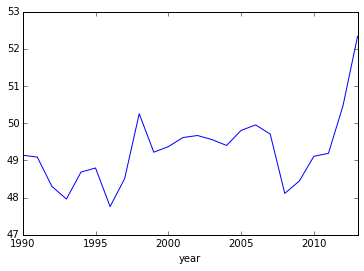

In [41]:
#We plot it
byyear.avg.plot.line()

## c)  

Calculate the one year difference of average land temperature by year and provide the maximum difference (value) with corresponding two years.


In [42]:
#To solve this problem we create 2 lists: one of yearly average temperatures and one of years
#Appends average temperature in series to list
avgtempbyyr=[]
for i in byyear.avg:
    avgtempbyyr.append(i)

In [43]:
#Appends year to list
yearrange = []
for num in range(1990,2014):
    yearrange.append(num)

In [44]:
#We find the difference from year to year using a for loop
#list for difference in temperature
tempdifference = []
#list for difference in year
yeardifference = []
#set counters
maximum=0
maxyear=0
for i in range(0,23):
    dex = i
    upone = dex + 1
    diff = avgtempbyyr[upone] - avgtempbyyr[dex]
    if abs(diff) > maximum:
        maximum=diff #We find the maximum difference
        maxyear = yrdiff = str(yearrange[upone])+"-"+str(yearrange[dex]) #Which year did the max difference occur?
    tempdifference.append(diff)
    yrdiff = str(yearrange[upone])+"-"+str(yearrange[dex])
    yeardifference.append(yrdiff)

In [45]:
#Print results
print "The maximum difference of: ",maximum,"degrees occurs in date range: ",maxyear

The maximum difference of:  1.86485 degrees occurs in date range:  2013-2012


In [46]:
#Let's list out all of the differences in years 
import numpy as np
byyeartempdifference = np.column_stack((yeardifference,tempdifference))
print byyeartempdifference

[['1991-1990' '-0.05025']
 ['1992-1991' '-0.7872']
 ['1993-1992' '-0.34035']
 ['1994-1993' '0.72555']
 ['1995-1994' '0.1092']
 ['1996-1995' '-1.038']
 ['1997-1996' '0.75345']
 ['1998-1997' '1.74285']
 ['1999-1998' '-1.0335']
 ['2000-1999' '0.14895']
 ['2001-2000' '0.2445']
 ['2002-2001' '0.05505']
 ['2003-2002' '-0.10995']
 ['2004-2003' '-0.15765']
 ['2005-2004' '0.4053']
 ['2006-2005' '0.1473']
 ['2007-2006' '-0.2466']
 ['2008-2007' '-1.59495']
 ['2009-2008' '0.3342']
 ['2010-2009' '0.6633']
 ['2011-2010' '0.0798']
 ['2012-2011' '1.2801']
 ['2013-2012' '1.86485']]


# (iii)

## a)

Find the difference between the maximum and the minimum temperatures for each major city and report/visualize top 20 cities with maximum differences for the period since 1900. 


In [47]:
#Code for City Data is similar to Country data
#Read in City Temp file as pandas frame
citytemp=pd.read_csv("CityTemp.csv")

In [48]:
#We then cut out the dates before the 20th century
citytemp2=citytemp[citytemp.Date.str.len()<=8]

In [49]:
#Group data by city 
citytempgroup=citytemp2.groupby("City")

In [50]:
#Calculate the difference in max and min average temperature by city 
citytempgroup.tempdiff = citytempgroup['MAverageTemp'].max() - citytempgroup['MAverageTemp'].min()


In [51]:
#Order data descending
citytempgroup.tempdiff = citytempgroup.tempdiff.order(ascending=False)


In [52]:
#drop NAs
citytempgroup.tempdiff = citytempgroup.tempdiff.dropna()

In [53]:
#get top 20 differences in max and min temperatures by city
citytop20 = citytempgroup.tempdiff[0:20]

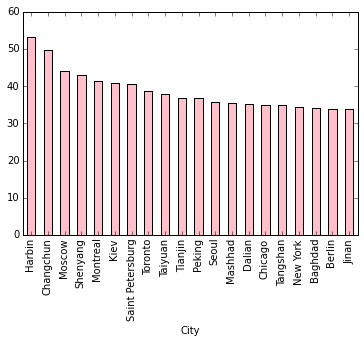

In [54]:
#plot differences
citytop20.plot.bar(color = 'pink')

## b)

Compare the two graphs in (i) and (iii) and comment on your comparison


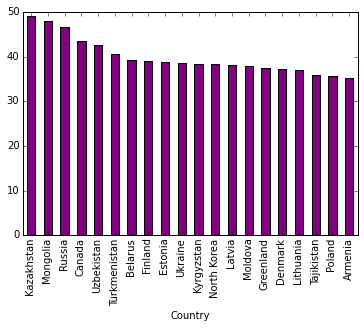

In [55]:
#Plots shown together
top20.plot.bar( color= 'purple')

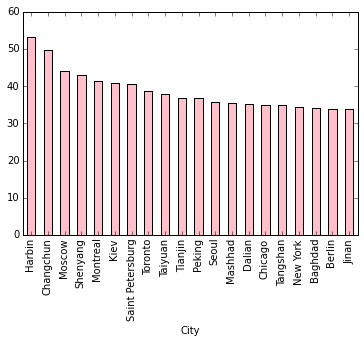

In [56]:
citytop20.plot.bar(color = 'pink')

It appears that the differences in average temperatures for cities are on average higher than the differences in average temperatures for whole cities. This makes sense as cities are smaller data points. There are some cities that also belong to the top 20 countries. For example, Moscow, Saint Petersburg, Kiev, and Toronto. However, there are also cities with to 20 temperature differences that do not belong to the top 20 countries. Examples are New York, Chicago, and Peking(China). It appears that the cities and countries that have the largest difference in average temperatures are those that can get very very cold in the winter. 

# End Question 4